In [2]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from numpy.random import randint
import numpy as np
from qiskit.providers.aer import QasmSimulator

C:\Users\kallo\anaconda3\envs\Quantum\lib\site-packages\qiskit\__init__.py:66: DeprecationWarning: Using Qiskit with Python 3.6 is deprecated as of qiskit-terra 0.17.0. Support for running Qiskit with Python 3.6 will be removed in qiskit-terra 0.20.0.
  DeprecationWarning,


In [5]:
num_qubits = 32

alice_basis = np.random.randint(2, size=num_qubits)
alice_state = np.random.randint(2, size=num_qubits)
bob_basis = np.random.randint(2, size=num_qubits)


print("Alice's State:", np.array2string(alice_state))
print("Alice's Bases:", np.array2string(alice_basis))
print("Bob's Bases:", np.array2string(bob_basis))

Alice's State: [0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 1 0 1 1 0 1 1 1 1 1 1]
Alice's Bases: [0 0 0 1 0 0 0 1 0 1 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1]
Bob's Bases: [0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 0 0 0 1 1 0 0 0 0 1 0 1 1 0 1 0 0]


In [8]:
def bb84_circuit(state, basis, measurement_basis):
   
    #state: array of 0s and 1s denoting the state to be encoded
    #basis: array of 0s and 1s denoting the basis to be used for encoding
                #0 -> Computational Basis
                #1 -> Hadamard Basis
    #meas_basis: array of 0s and 1s denoting the basis to be used for measurement
                #0 -> Computational Basis
                #1 -> Hadamard Basis

    num_qubits = len(state)
    
    bb84_circuit = QuantumCircuit(num_qubits)

    # Sender prepares qubits
    for i in range(len(basis)):
        if state[i] == 1:
            bb84_circuit.x(i)
        if basis[i] == 1:
            bb84_circuit.h(i)
   

    # Measuring action performed by Bob
    for i in range(len(measurement_basis)):
        if measurement_basis[i] == 1:
            bb84_circuit.h(i)

       
    bb84_circuit.measure_all()
    
    return bb84_circuit

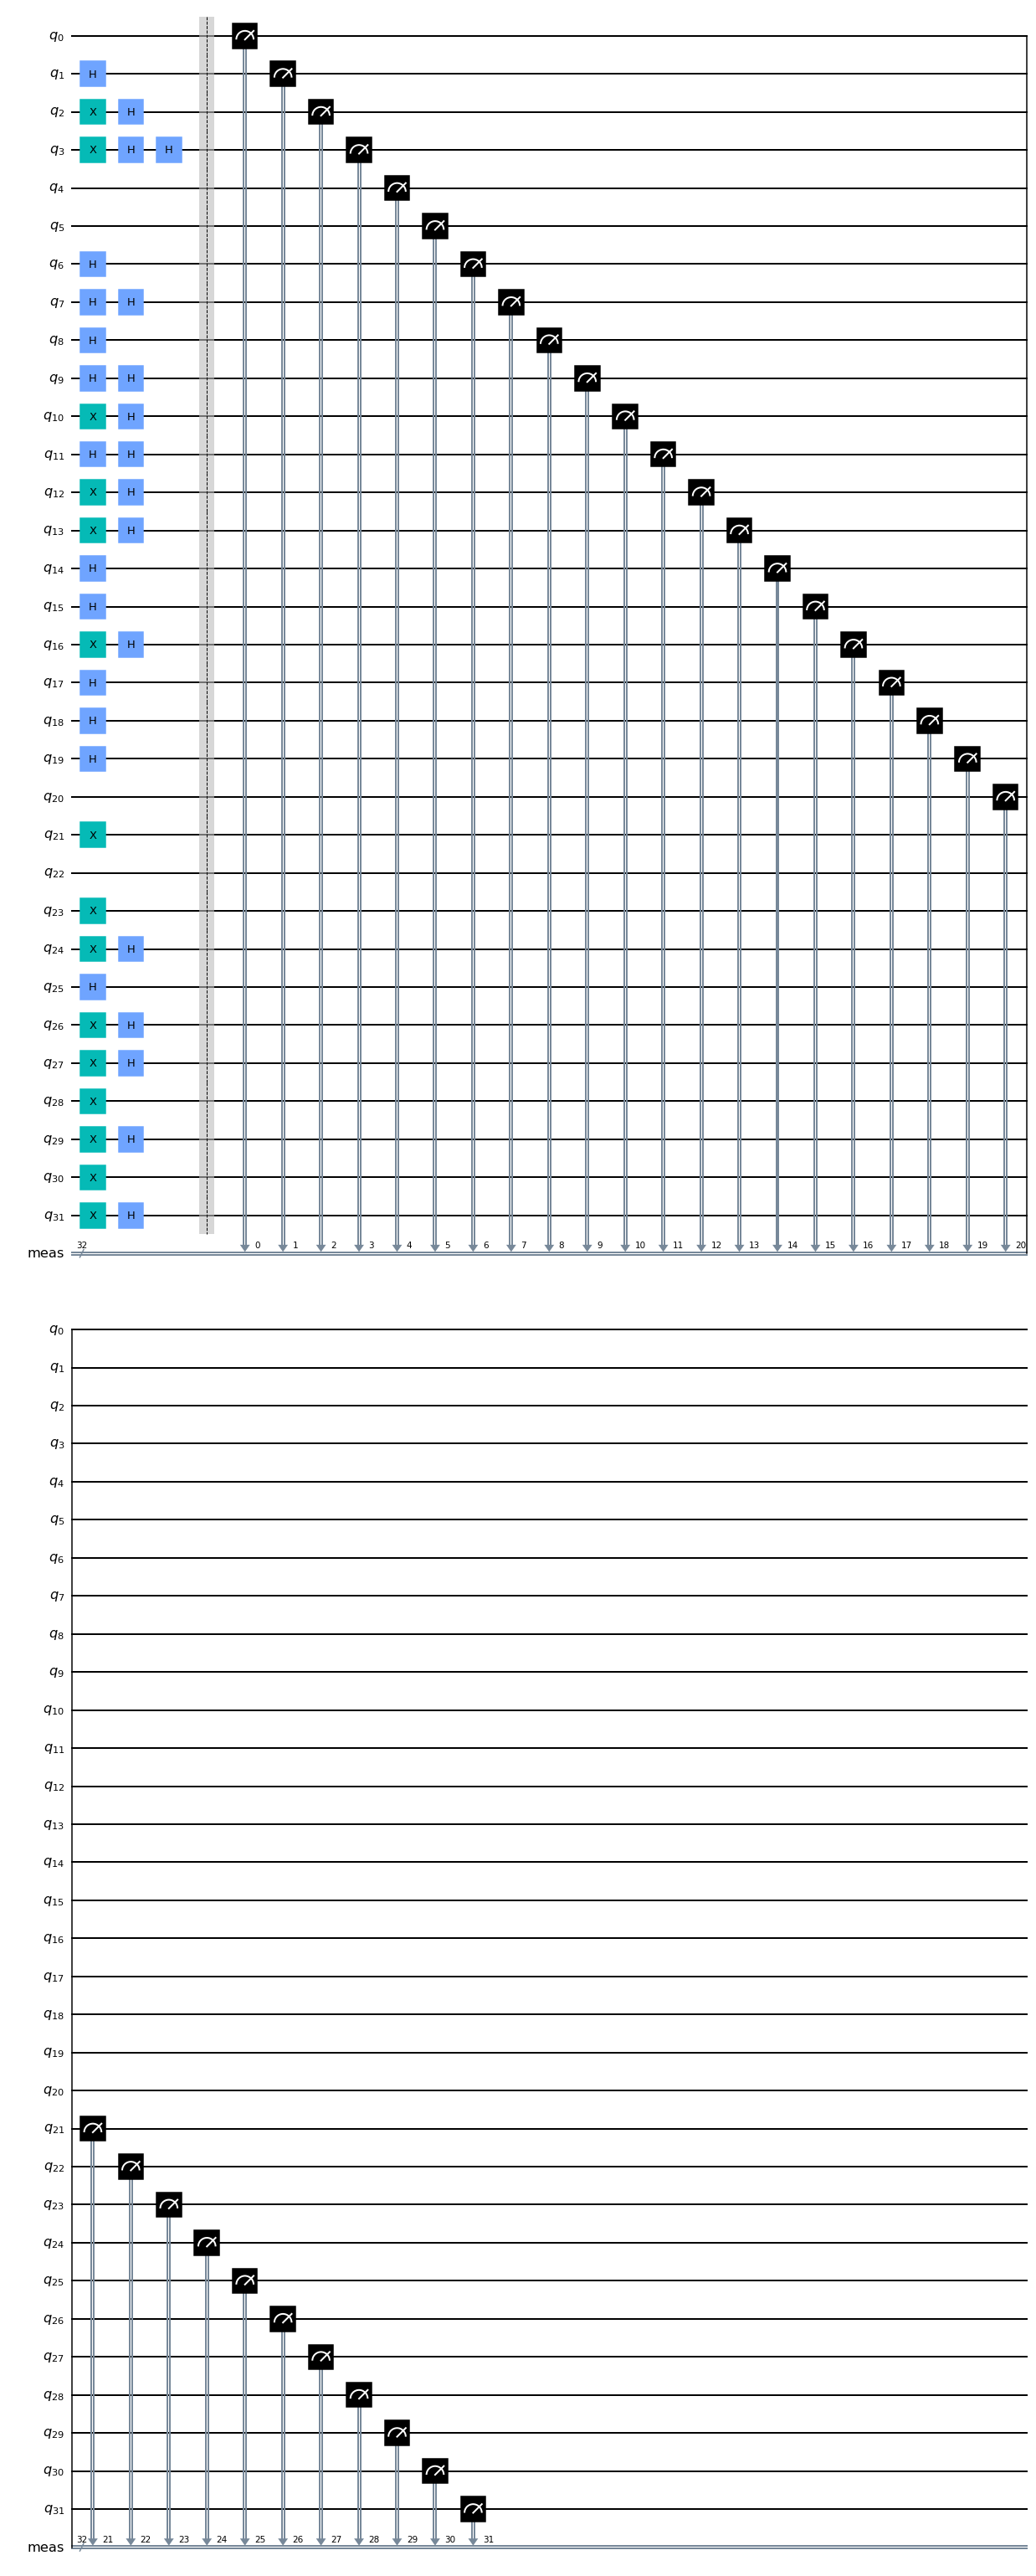

In [10]:
bb84 = bb84_circuit(alice_state, alice_basis, bob_basis)
bb84.draw("mpl")